In [1]:
import pandas as pd
# Load the first dataset
separable_dataset_path = "A2-ring/A2-ring-separable.txt"

# Load the first dataset with correct separator
separable_dataset = pd.read_csv(separable_dataset_path, sep="\t", header=None)

# Show the first few rows
separable_dataset.head()
# Load the second dataset
merged_dataset_path = "A2-ring/A2-ring-merged.txt"
merged_dataset = pd.read_csv(merged_dataset_path, sep="\t", header=None)

# Load the test dataset
test_dataset_path = "A2-ring/A2-ring-test.txt"
test_dataset = pd.read_csv(test_dataset_path, sep="\t", header=None)

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

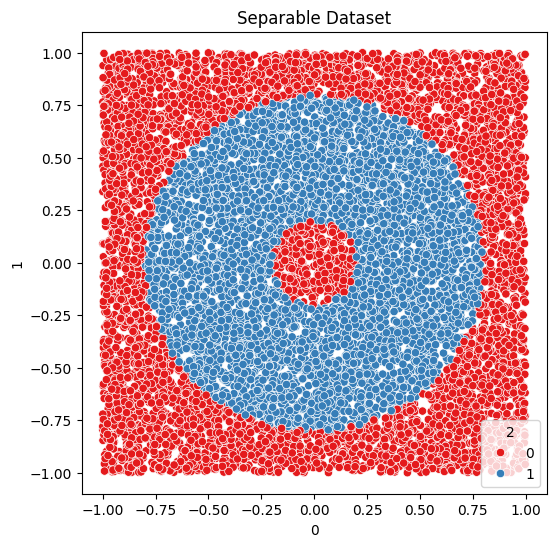

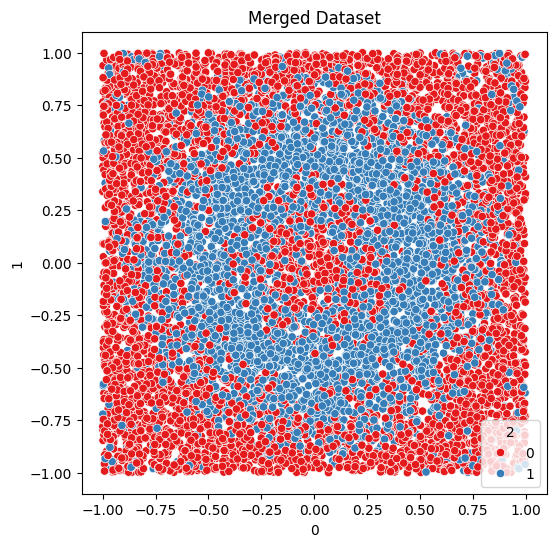

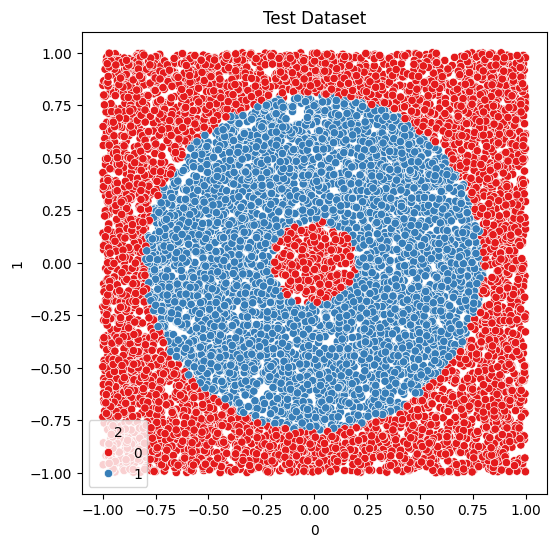

In [3]:
# Show the first few rows of each dataset
merged_dataset.head(), test_dataset.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the datasets
def plot_dataset(df, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=df[0], y=df[1], hue=df[2], palette="Set1")
    plt.title(title)
    plt.show()

# Visualize the datasets
plot_dataset(separable_dataset, 'Separable Dataset')
plot_dataset(merged_dataset, 'Merged Dataset')
plot_dataset(test_dataset, 'Test Dataset')


In [4]:
# Function to check for missing values and class distributions
def check_data(df, name):
    print(f"Dataset: {name}")
    print("Missing values:")
    print(df.isnull().sum())
    print("Class distribution:")
    print(df[2].value_counts())
    print("\n")

# Check the datasets
check_data(separable_dataset, 'Separable Dataset')
check_data(merged_dataset, 'Merged Dataset')
check_data(test_dataset, 'Test Dataset')

# Function to examine the descriptive statistics of a dataset
def describe_data(df, name):
    print(f"Dataset: {name}")
    print(df.describe())
    print("\n")

# Describe the datasets
describe_data(separable_dataset, 'Separable Dataset')
describe_data(merged_dataset, 'Merged Dataset')
describe_data(test_dataset, 'Test Dataset')


Dataset: Separable Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
2
0    5203
1    4797
Name: count, dtype: int64


Dataset: Merged Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
2
0    5515
1    4485
Name: count, dtype: int64


Dataset: Test Dataset
Missing values:
0    0
1    0
2    0
dtype: int64
Class distribution:
2
0    5333
1    4667
Name: count, dtype: int64


Dataset: Separable Dataset
                  0             1             2
count  10000.000000  10000.000000  10000.000000
mean      -0.003277     -0.000642      0.479700
std        0.574481      0.577676      0.499613
min       -0.999944     -0.999873      0.000000
25%       -0.498429     -0.498273      0.000000
50%        0.000014     -0.005922      0.000000
75%        0.490985      0.500586      1.000000
max        0.999516      0.999813      1.000000


Dataset: Merged Dataset
                  0             1             2
count  10000.000000  10000.000000 

In [5]:
# Separate features and target for each dataset
X_sep = separable_dataset[[0, 1]]
y_sep = separable_dataset[2]
X_mer = merged_dataset[[0, 1]]
y_mer = merged_dataset[2]
X_test = test_dataset[[0, 1]]
y_test = test_dataset[2]

# Function to apply SVM without cross-validation
def apply_svm_simple(X_train, y_train, X_test, y_test):
    # Create SVM classifier with 'rbf' kernel
    svm = SVC(kernel='rbf', C=1, gamma='scale')

    # Train the model
    svm.fit(X_train, y_train)

    # Evaluate the SVM on the test set
    y_pred = svm.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return svm

# Apply SVM to separable dataset
print("Separable Dataset")
svm_sep = apply_svm_simple(X_sep, y_sep, X_test, y_test)

# Apply SVM to merged dataset
print("\nMerged Dataset")
svm_mer = apply_svm_simple(X_mer, y_mer, X_test, y_test)

Separable Dataset
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5333
           1       0.95      1.00      0.98      4667

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix:
[[5108  225]
 [  11 4656]]
ROC AUC Score:  0.9777264443073117

Merged Dataset
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5333
           1       0.93      0.98      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix:
[[4999  334]
 [  74 4593]]
ROC AUC Score:  0.960757537703938


In [6]:
# Function to apply SVM and perform cross-validation
def apply_svm(X_train, y_train, X_test, y_test):
    # Define parameter grid
    param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}

    # Create SVM classifier with 'rbf' kernel
    svm = SVC(kernel='rbf')

    # Perform cross-validation to find best parameters
    grid = GridSearchCV(svm, param_grid, cv=3)
    grid.fit(X_train, y_train)

    # Print best parameters
    print("Best parameters: ", grid.best_params_)

    # Evaluate the SVM on the test set
    y_pred = grid.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    return grid

# Separate features and target for each dataset
X_sep = separable_dataset[[0, 1]]
y_sep = separable_dataset[2]
X_mer = merged_dataset[[0, 1]]
y_mer = merged_dataset[2]
X_test = test_dataset[[0, 1]]
y_test = test_dataset[2]

# Apply SVM to separable dataset
print("Separable Dataset")
grid_sep = apply_svm(X_sep, y_sep, X_test, y_test)

# Apply SVM to merged dataset
print("\nMerged Dataset")
grid_mer = apply_svm(X_mer, y_mer, X_test, y_test)


Separable Dataset
Best parameters:  {'C': 10, 'gamma': 1}
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5333
           1       0.98      1.00      0.99      4667

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix:
[[5234   99]
 [   6 4661]]
ROC AUC Score:  0.9900753586578483

Merged Dataset
Best parameters:  {'C': 10, 'gamma': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5333
           1       0.93      0.99      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix:
[[4967  366]
 [  29 4638]]
ROC AUC Score:  0.9625784344004895


In [7]:
from sklearn.metrics import accuracy_score

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, name):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"\nMetrics for {name} Dataset:")
    print("Accuracy:", accuracy)
    print("AUC:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Error:", 1 - accuracy)

# Apply SVM to separable dataset
print("Separable Dataset - Simple SVM")
svm_sep_simple = apply_svm_simple(X_sep, y_sep, X_test, y_test)
y_pred_sep_simple = svm_sep_simple.predict(X_test)
print_metrics(y_test, y_pred_sep_simple, "Separable")

# Apply SVM to merged dataset
print("\nMerged Dataset - Simple SVM")
svm_mer_simple = apply_svm_simple(X_mer, y_mer, X_test, y_test)
y_pred_mer_simple = svm_mer_simple.predict(X_test)
print_metrics(y_test, y_pred_mer_simple, "Merged")

# Apply SVM to separable dataset with cross-validation
print("\nSeparable Dataset - SVM with Cross-validation")
svm_sep_cv = apply_svm(X_sep, y_sep, X_test, y_test)
y_pred_sep_cv = svm_sep_cv.predict(X_test)
print_metrics(y_test, y_pred_sep_cv, "Separable")

# Apply SVM to merged dataset with cross-validation
print("\nMerged Dataset - SVM with Cross-validation")
svm_mer_cv = apply_svm(X_mer, y_mer, X_test, y_test)
y_pred_mer_cv = svm_mer_cv.predict(X_test)
print_metrics(y_test, y_pred_mer_cv, "Merged")


Separable Dataset - Simple SVM
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5333
           1       0.95      1.00      0.98      4667

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix:
[[5108  225]
 [  11 4656]]
ROC AUC Score:  0.9777264443073117

Metrics for Separable Dataset:
Accuracy: 0.9764
AUC: 0.9777264443073117
Confusion Matrix:
[[5108  225]
 [  11 4656]]
Classification Error: 0.023599999999999954

Merged Dataset - Simple SVM
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5333
           1       0.93      0.98      0.96      4667

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000
